In [1]:
# === 1. Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [3]:
# === 2. Load Raw Data ===
raw_path = '../data/raw data/BrentOilPrices.csv'
df = pd.read_csv(raw_path)



In [4]:
# === 3. Basic Cleaning ===
df = df.rename(columns=lambda x: x.strip())  # remove whitespace in column names
df['Date'] = pd.to_datetime(df['Date'])      # convert Date to datetime
df = df.sort_values('Date').reset_index(drop=True)
df = df[['Date', 'Price']].dropna()          # keep only relevant columns and drop NAs



C:\Users\ltlid\AppData\Local\Temp\ipykernel_8820\94946264.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])      # convert Date to datetime


In [5]:
# === 4. Export Cleaned Data ===
processed_path = '../data/processed/brent_clean.csv'
os.makedirs('../data/processed', exist_ok=True)
df.to_csv(processed_path, index=False)



In [6]:
# === 5. Feature Engineering: Log Returns ===
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))
df.dropna(inplace=True)



In [7]:
# Rolling statistics (30-day window)
df['Rolling_Mean'] = df['Log_Return'].rolling(window=30).mean()
df['Rolling_Std'] = df['Log_Return'].rolling(window=30).std()



In [8]:
# === 6. Save Engineered Features ===
log_feature_path = '../data/processed/brent_log_features.csv'
df.to_csv(log_feature_path, index=False)



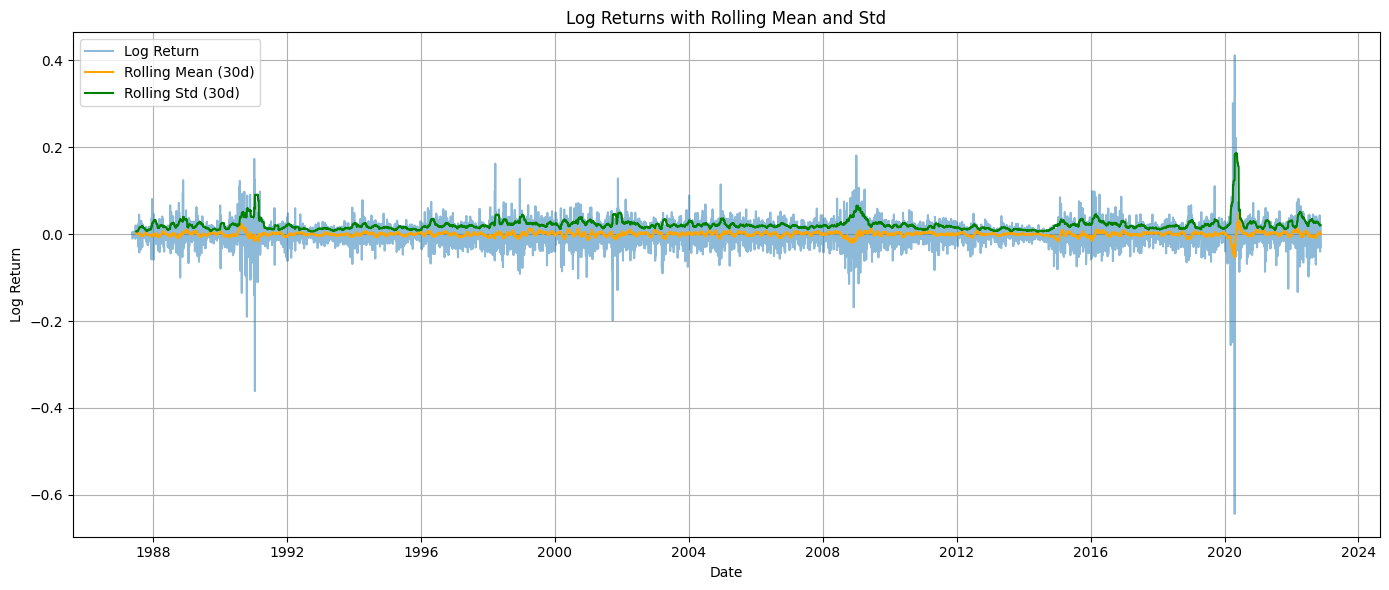

In [9]:
# === 7. Visualize Log Returns and Rolling Statistics ===
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['Date'], df['Log_Return'], label='Log Return', alpha=0.5)
ax.plot(df['Date'], df['Rolling_Mean'], label='Rolling Mean (30d)', color='orange')
ax.plot(df['Date'], df['Rolling_Std'], label='Rolling Std (30d)', color='green')
ax.set_title("Log Returns with Rolling Mean and Std")
ax.set_xlabel("Date")
ax.set_ylabel("Log Return")
ax.legend()
ax.grid(True)
plt.tight_layout()



In [11]:
# Save the figure
os.makedirs('../reports/figures', exist_ok=True)
fig_path = '../reports/log_returns_with_rolling_stats.png'
plt.savefig(fig_path)
plt.show()


<Figure size 640x480 with 0 Axes>